In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
df_train = pd.read_csv("./dataset/train.csv")

df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [72]:
df_train_g = df_train[['YearBuilt', 'SalePrice']].groupby(['YearBuilt', 'SalePrice'])

df_train_g = df_train_g[['YearBuilt', 'SalePrice']].head(len(df_train_g))

df_train_g = df_train_g.sort_values('YearBuilt')

df_train_g_mean = df_train_g.groupby(['YearBuilt']).mean()

df_train_g_count = df_train_g.groupby(['YearBuilt']).count()

df_train_g_count['SalePrice']

YearBuilt
1872     1
1875     1
1880     4
1882     1
1885     2
        ..
2006    67
2007    49
2008    23
2009    18
2010     1
Name: SalePrice, Length: 112, dtype: int64

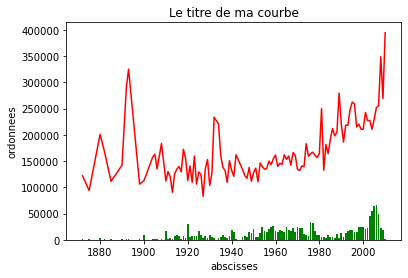

In [87]:
plt.plot(df_train_g_mean.index, df_train_g_mean['SalePrice'] , 'r');
#plt.plot(df_train_g_mean.index, df_train_g_count['SalePrice']*1000, '--b');
plt.bar(df_train_g_mean.index, df_train_g_count['SalePrice']*1000, color = 'green');
plt.title('Le titre de ma courbe')
plt.xlabel('abscisses')
plt.ylabel('ordonnees');